In [1]:
import matplotlib.pyplot as plt     # matplotlib 库主要用于数据可视化，制作各种图表
import numpy as np

In [2]:
# 正样本
x1 = [0, 1]
y1 = [1, 0]
# 负样本
x2 = [0, 1]
y2 = [0, 1]


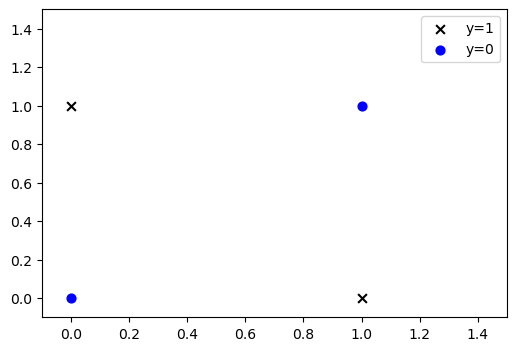

In [3]:
plt.figure(figsize = (6, 4))  # 创建一个绘图窗口，宽6英尺，高4英尺
plt.scatter(x1, y1, c = 'k', marker = 'x', s = 40, label = 'y=1')   # 绘制正样本的散点图
plt.scatter(x2, y2, c = 'b', marker = 'o', s = 40, label = 'y=0')   # 绘制负样本的散点图
plt.xlim(-0.1, 1.5)    # 设置x轴的范围
plt.ylim(-0.1, 1.5)    # 设置y轴的范围
plt.legend(loc = 'best')   # 设置图例所在的位置，使用推荐位置
plt.show()    

In [4]:
# 解决“异或”问题

# 定义sigmoid函数(含原函数和导数，用于激活与反向传播求梯度)。
def sigmoid(x, deriv=False):
    if(deriv == True):
        return x * (1-x)
    return 1 / (1+np.exp(-x))


In [5]:
# 准备“异或”问题的输入数据 X 与 目标输出 y
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])

y = np.array([[0], [1], [1], [0]])


In [6]:
# 初始化网络权重(syn0为输入层到隐藏层的权重，syn1为隐藏层到输出层的权重)

np.random.seed(1)   # 设置numpy的随机种子为1， 这样可以保证每次运行代码时，随机生成的权重是相同的，

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((2, 4))-1     # 2行4列的numpy数组，值在-1到1之间
syn1 = 2*np.random.random((4, 1))-1     # 4行1列的numpy数组，值在-1到1之间
syn0

array([[-0.16595599,  0.44064899, -0.99977125, -0.39533485],
       [-0.70648822, -0.81532281, -0.62747958, -0.30887855]])

In [9]:
# 进行多轮训练：前向传播计算各层输出，计算输出误差，再通过反向传播更新权重，不断优化网络
# 训练循环
for j in range(50000):     # 开始一个50000次的循环，用于训练神经网络
    # Feed forward through layers 0, 1, and 2
    l0 = X       # 将输入数据X赋值给10，表示神经网络的输入层
    l1 = sigmoid(np.dot(l0, syn0))     # 计算第一层隐藏层l1的值，通过将输入层l0与第一层权重syn0做点积，然后应用sigmoid函数得到
    l2 = sigmoid(np.dot(l1, syn1))     # 计算输出层l2的值，通过将第一层隐藏层l1与第二层权重syn1做点积，然后应用sigmoid函数得到
    
    # how much did we miss the target value?
    l2_error = y-l2      # 计算输出层的误差，即目标输出y与实际输出l2的差值
    
    if (j%10000) == 0:
        print("Error:"+str(np.mean(np.abs(l2_error))))      # 每10000次迭代， 打印一次平均误差，用于观察训练过程中误差的变化
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error * sigmoid(l2, deriv=True)       # 计算输出层的误差梯度，通过将输出层误差l2_error与sigmoid函数在l2处的导数相乘得到
    
    # how much did each l1 value contribute to the l2 error （according to the weights）?
    l1_error = l2_delta.dot(syn1.T)     # 计算第一层隐藏层的误差，通过将输出层的误差梯度l2_delta与第二层权重syn1的转置做点积得到
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * sigmoid(l1, deriv=True)    # 计算第一层隐藏层的误差梯度， 通过将第一层隐藏层误差l1_error与sigmoid函数在l1处的导数相乘得到

    
    syn1 += l1.T.dot(l2_delta)    # 更新第二层权重syn1, 通过将第一层隐藏层l1的转置与输出层误差梯度l2_delta做点积，并累加到syn1上
    syn0 += l0.T.dot(l1_delta)    # 更新第一层权重syn0，通过将输入层l0的转置与第一层隐藏层误差梯度l1_delta做点积，并累加到syn0上
    

    

Error:0.00749819542448113
Error:0.006772654732878499
Error:0.006220320213389441
Error:0.00578272041142254
Error:0.005425476184114419


In [10]:
# 最终输出训练后网络对输入的预测结果，观察是否能拟合“异或”逻辑
print("Output After Training:")
print(l2)       # 打印训练后的输出层l2的值，观察神经网络对"异或"问题的预测结果

Output After Training:
[[0.00610106]
 [0.99543826]
 [0.99456855]
 [0.00441369]]
